In [1]:
import keras
keras.__version__
from keras.datasets import imdb
from keras.datasets import reuters
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical


In [2]:
#prepping the data

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) =reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

#one hot encode labes
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

#train test
partial_x_train = input_train

partial_y_train = one_hot_train_labels

#train test
x_test = input_test

y_test = one_hot_test_labels

Loading data...
2121728/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [3]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding


In [4]:
from tensorflow.keras.layers import SimpleRNN
from keras import layers

In [17]:
model = Sequential()
model.add(Embedding(max_features, 100))
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(256, return_sequences=True))
model.add(SimpleRNN(256, return_sequences=True))
model.add(LSTM(128))
model.add(layers.Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=.2)

Epoch 1/30
57/57 [==============================] - 374s 6s/step - loss: 2.7136 - acc: 0.3045 - val_loss: 2.8419 - val_acc: 0.3445
Epoch 2/30
57/57 [==============================] - 372s 7s/step - loss: 2.5265 - acc: 0.3301 - val_loss: 2.4178 - val_acc: 0.3450
Epoch 3/30
57/57 [==============================] - 378s 7s/step - loss: 2.5722 - acc: 0.3244 - val_loss: 2.4227 - val_acc: 0.3450
Epoch 4/30
57/57 [==============================] - 374s 7s/step - loss: 2.5346 - acc: 0.3374 - val_loss: 2.4208 - val_acc: 0.3478
Epoch 5/30
57/57 [==============================] - 367s 6s/step - loss: 2.4684 - acc: 0.3477 - val_loss: 2.1805 - val_acc: 0.4418
Epoch 6/30
57/57 [==============================] - 369s 6s/step - loss: 2.1870 - acc: 0.4585 - val_loss: 2.2733 - val_acc: 0.4457
Epoch 7/30
57/57 [==============================] - 374s 7s/step - loss: 2.1588 - acc: 0.4473 - val_loss: 2.0460 - val_acc: 0.4858
Epoch 8/30
57/57 [==============================] - 373s 7s/step - loss: 2.0019 - a

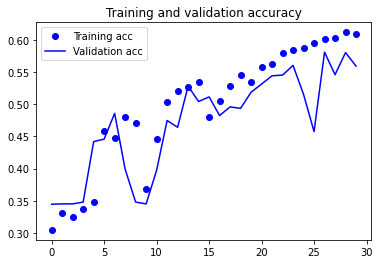

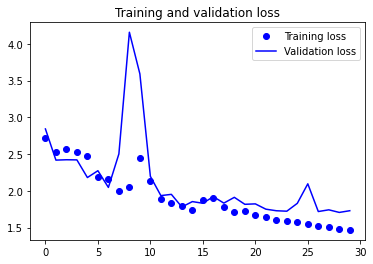

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)

71/71 [==============================] - 38s 533ms/step - loss: 1.7814 - acc: 0.5450
Accuracy: 0.544968843460083


In [20]:
model.save_weights('Reuter-dataSet-Weights')
model.save_weights('Reuter-dataSet-Weights.h5')
model.save('Reuters-RNN/LSTM-Model.h5')

In [30]:
model.save('Reuters-RNN-LSTM-Model.h5')


In [32]:
saved_model = keras.models.load_model('Reuters-RNN-LSTM-Model.h5')
saved_model.evaluate(x_test,y_test)

71/71 [==============================] - 38s 529ms/step - loss: 1.7814 - acc: 0.5450


[1.7814215421676636, 0.544968843460083]

In [42]:
model.load_weights('/content/Reuter-dataSet-Weights.h5')

In [43]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 38s 535ms/step - loss: 1.7814 - acc: 0.5450


[1.7814215421676636, 0.544968843460083]